# Predict whether income exceeds $50K/yr based on census data. 
Also known as "Census Income" dataset.


Import some basic libraries.
* Pandas - provided data frames
* matplotlib.pyplot - plotting support

Use Magic %matplotlib to display graphics inline instead of in a popup window.


In [4]:
import pandas as pd                 # pandas is a dataframe library
import matplotlib.pyplot as plt      # matplotlib.pyplot plots data

%matplotlib inline

## Loading and Reviewing the Data

In [5]:
df = pd.read_csv("./data/adult.csv")

In [6]:
df.shape

(32561, 14)

In [7]:
df.head(5)

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,money
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [8]:
df.tail(5)

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,money
32556,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


### Definition of features
From the metadata on the data source we have the following definition of the features.

| Feature  | Description |
|--------------|-------------|
| age     | age of people         |
| workclass | type of workclass         |
| education | name of education |
| education-num	 | number of education) |
| marital-status |  marital status |
| occupation |  occupation of the person |
| relationship | relationship status|
| race | race |
| sex | sex |
| relationship | relationship status|
| capital-gain | capital gain|
| capital-loss | capital loss|
| hours-per-week | hours-per-week in job|
| native-country | native country of origin of the person |

## Check for null values

In [9]:
df.isnull().values.any()

False

# Deleting non-specific and dummy data:
Education - because it's already given education in numbers.

Capital-gain and loss - because most of them are 0.

Native-country and occupation - because only a few of them are distinct.

In [10]:
del df['education']
del df['capital-gain']
del df['capital-loss']
del df['native-country']
del df['occupation']

# Data Types

Inspect data types to see if there are any issues.  Data should be numeric.

## Converting string to num:
For each column we make a map to convert from string to number.

In [11]:
sex_map = {' Male' : 1, ' Female' : 0}
df['sex'] = df['sex'].map(sex_map)
s = ' White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black'
race_map = {' White': 0, ' Asian-Pac-Islander': 1, ' Amer-Indian-Eskimo': 2, ' Other': 3, ' Black': 4}
df['race'] = df['race'].map(race_map)
money_map = {' <=50K': 0, ' >50K': 1}
df['money'] = df['money'].map(money_map)
rel_map = {' Wife': 0, ' Own-child': 1, ' Husband': 2, ' Not-in-family': 3, ' Other-relative': 4, ' Unmarried': 5}
df['relationship'] = df['relationship'].map(rel_map)
mar_map = {' Married-civ-spouse': 0, ' Divorced': 1, ' Never-married': 2, ' Separated': 3, ' Widowed': 4, ' Married-spouse-absent': 5, ' Married-AF-spouse': 6}
df['marital-status'] = df['marital-status'].map(mar_map)
work_map = {' Private': 0, ' Self-emp-not-inc': 1, ' Self-emp-inc': 2, ' Federal-gov': 3, ' Local-gov': 4, ' State-gov': 5, ' Without-pay': 6, ' Never-worked': 7, ' ?': 8}
df['workclass'] = df['workclass'].map(work_map)


### Check for null values

### Correlated Feature Check

In [12]:
df.isnull().values.any()

False

Helper function that displays correlation by color.  Red is most correlated, Blue least.

In [13]:
def plot_corr(df, size=10):

    corr = df.corr()    # data frame correlation function
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)   # color code the rectangles by correlation value
    plt.xticks(range(len(corr.columns)), corr.columns)  # draw x tick marks
    plt.yticks(range(len(corr.columns)), corr.columns)  # draw y tick marks


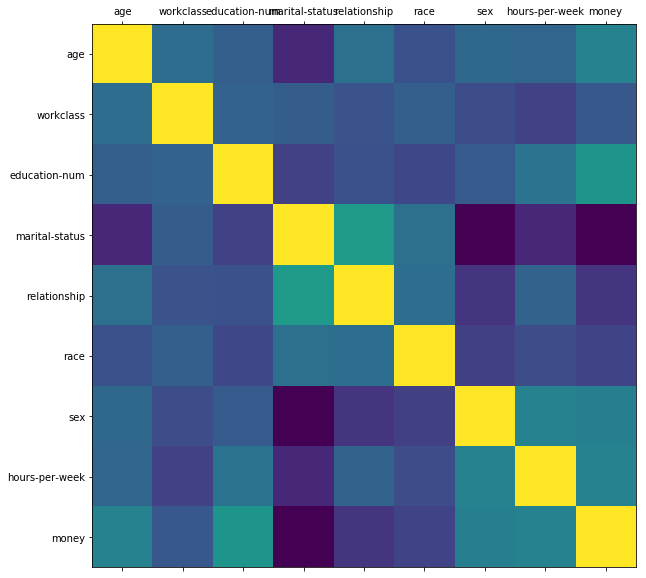

In [14]:
plot_corr(df)

In [15]:
df.corr()

,age,workclass,education-num,marital-status,relationship,race,sex,hours-per-week,money
age,1.000000,0.114059,0.036527,-0.220938,0.128919,-0.029869,0.088832,0.068756,0.234037
workclass,0.114059,1.000000,0.051581,0.025886,-0.026602,0.037281,-0.053619,-0.112513,-0.004868
education-num,0.036527,0.051581,1.000000,-0.107648,-0.031898,-0.078799,0.012280,0.148123,0.335154
marital-status,-0.220938,0.025886,-0.107648,1.000000,0.362819,0.131782,-0.380043,-0.221882,-0.377794
relationship,0.128919,-0.026602,-0.031898,0.362819,1.000000,0.120530,-0.169737,0.056941,-0.171771
race,-0.029869,0.037281,-0.078799,0.131782,0.120530,1.000000,-0.117363,-0.054443,-0.096839
sex,0.088832,-0.053619,0.012280,-0.380043,-0.169737,-0.117363,1.000000,0.229309,0.215980
hours-per-week,0.068756,-0.112513,0.148123,-0.221882,0.056941,-0.054443,0.229309,1.000000,0.229689
money,0.234037,-0.004868,0.335154,-0.377794,-0.171771,-0.096839,0.215980,0.229689,1.000000


In [16]:
df.head(5)

,age,workclass,education-num,marital-status,relationship,race,sex,hours-per-week,money
0,39,5,13,2,3,0,1,40,0
1,50,1,13,0,2,0,1,13,0
2,38,0,9,1,3,0,1,40,0
3,53,0,7,0,2,4,1,40,0
4,28,0,13,0,0,4,0,40,0


The correlations look good.  There appear to be no coorelated columns.

### Spliting the data 

70% for training, 30% for testing

In [17]:
from sklearn.cross_validation import train_test_split

feature_col_names = ['age', 'workclass', 'education-num', 'marital-status', 'relationship', 'race', 'sex', 'hours-per-week']
predicted_class_names = ['money']

X = df[feature_col_names].values     # predictor feature columns (8 X m)
y = df[predicted_class_names].values # predicted class (1=true, 0=false) column (1 X m)
split_test_size = 0.30

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_test_size, random_state=42) 
                            # test_size = 0.3 is 30%, 42 is the answer to everything

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


We check to ensure we have the the desired 70% train, 30% test split of the data

In [18]:
print("{0:0.2f}% in training set".format((len(X_train)/len(df.index)) * 100))
print("{0:0.2f}% in test set".format((len(X_test)/len(df.index)) * 100))

70.00% in training set
30.00% in test set


## Training Initial Algorithm - Naive Bayes

In [19]:
from sklearn.naive_bayes import GaussianNB

# create Gaussian Naive Bayes model object and train it with the data
nb_model = GaussianNB()

nb_model.fit(X_train, y_train.ravel())

GaussianNB(priors=None)

### Performance on Training Data

In [20]:
# predict values using the training data
nb_predict_train = nb_model.predict(X_train)

# import the performance metrics library
from sklearn import metrics

# Accuracy
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, nb_predict_train)))
print()

Accuracy: 0.7585



### Performance on Testing Data

In [21]:
# predict values using the testing data
nb_predict_test = nb_model.predict(X_test)

from sklearn import metrics

# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, nb_predict_test)))


Accuracy: 0.7639


#### Metrics

In [22]:
print("Confusion Matrix")
# Note the use of labels for set 1=True to upper left and 0=False to lower right
print("{0}".format(metrics.confusion_matrix(y_test, nb_predict_test, labels=[1, 0])))
print("")

print("Classification Report")
print(metrics.classification_report(y_test, nb_predict_test, labels=[1,0]))


Confusion Matrix
[[1682  632]
 [1674 5781]]

Classification Report
             precision    recall  f1-score   support

          1       0.50      0.73      0.59      2314
          0       0.90      0.78      0.83      7455

avg / total       0.81      0.76      0.78      9769



## Random Forest

In [23]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)      # Create random forest object
rf_model.fit(X_train, y_train.ravel()) 

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

### Predict Training Data

In [24]:
rf_predict_train = rf_model.predict(X_train)
# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, rf_predict_train)))

Accuracy: 0.9290


### Predict Test Data

In [25]:
rf_predict_test = rf_model.predict(X_test)

# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, rf_predict_test)))

Accuracy: 0.8083


In [26]:
print(metrics.confusion_matrix(y_test, rf_predict_test, labels=[1, 0]) )
print("")
print("Classification Report")
print(metrics.classification_report(y_test, rf_predict_test, labels=[1,0]))

[[1199 1115]
 [ 758 6697]]

Classification Report
             precision    recall  f1-score   support

          1       0.61      0.52      0.56      2314
          0       0.86      0.90      0.88      7455

avg / total       0.80      0.81      0.80      9769

